# DATA DISCRIPTION & PROBLEM DEFINITION :

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.


## PROBLEM DEFINITION :
 
## We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
dftr=pd.read_excel(r'C:\Users\HP\Downloads\train_agriculture.xlsx') 
dftr

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
dfte=pd.read_excel(r'C:\Users\HP\Downloads\test_agriculture.xlsx') 
dfte

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


# EXPLORATORY DATA ANALYSIS FOR TRAIN AND TEST DATA

In [4]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [5]:
dftr.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

# FINDING NaN VALUES

In [6]:
dftr.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

# We can see that the "Number_Weeks_Used" has missing values. so we will impute the given attribute with its mean value.

In [7]:
dftr.shape

(4599, 10)

In [8]:
dftr["Number_Weeks_Used"].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [9]:
dftr["Number_Weeks_Used"].mean()

28.89102718306471

# Imputing the mean value for the given attribute.

In [10]:
dftr['Number_Weeks_Used'].fillna(dftr['Number_Weeks_Used'].mean(),inplace=True)

In [11]:
dftr.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# statistical data

In [12]:
dftr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [13]:
dfte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [14]:
dfte.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [15]:
dfte.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

# We can see that the "Number_Weeks_Used" has missing values. so we will impute the given attribute with its mean value.

In [16]:
dfte.shape

(1199, 9)

In [17]:
dfte["Number_Weeks_Used"].unique()

array([nan,  0., 20., 19., 10., 14., 22., 13., 26., 17., 15., 25., 18.,
       29., 23., 27., 34., 16., 35., 28., 21., 12., 31., 33., 24., 36.,
       38., 30., 32.,  6., 41.,  7., 37., 40., 39., 45., 47., 42., 43.,
       44., 50., 52., 48., 46., 49., 56., 57., 54., 51., 53., 58., 59.,
       64., 62.,  5.,  9., 55.,  8., 11.])

In [18]:
dfte["Number_Weeks_Used"].mean()

29.033333333333335

# Imputing the mean value for the given attribute.

In [19]:
dfte['Number_Weeks_Used'].fillna(dfte['Number_Weeks_Used'].mean(),inplace=True)

In [20]:
dfte.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [21]:
dfte.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.130647,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,29.033333,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


# FINDING THE SKEWNESS IN THE GIVEN DATA-SET - TRAIN DATA

In [22]:
dftr.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

# correcting the skewness

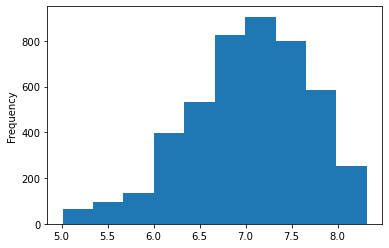

In [23]:
#removing skewness using boxcox
from scipy.stats import boxcox
dftr["Estimated_Insects_Count"]=boxcox(dftr["Estimated_Insects_Count"],0) #0 represents log transform
dftr["Estimated_Insects_Count"].plot.hist()

# Dropping the ID attribute , since it doesnt give any computable value to our given data-set.

In [24]:
dftr.drop(["ID"],axis=1,inplace=True)
dftr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.236442,1,0,1,0,0.000000,0,1,0
1,5.342334,1,0,1,0,0.000000,0,2,1
2,5.549076,1,0,1,0,0.000000,0,2,1
3,5.549076,1,1,1,0,0.000000,0,2,1
4,5.834811,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,7.667626,0,1,2,20,28.891027,1,1,1
4595,7.668094,0,1,2,30,47.000000,2,1,1
4596,7.726213,0,1,2,10,7.000000,27,2,0
4597,7.726213,0,1,2,10,20.000000,24,2,0


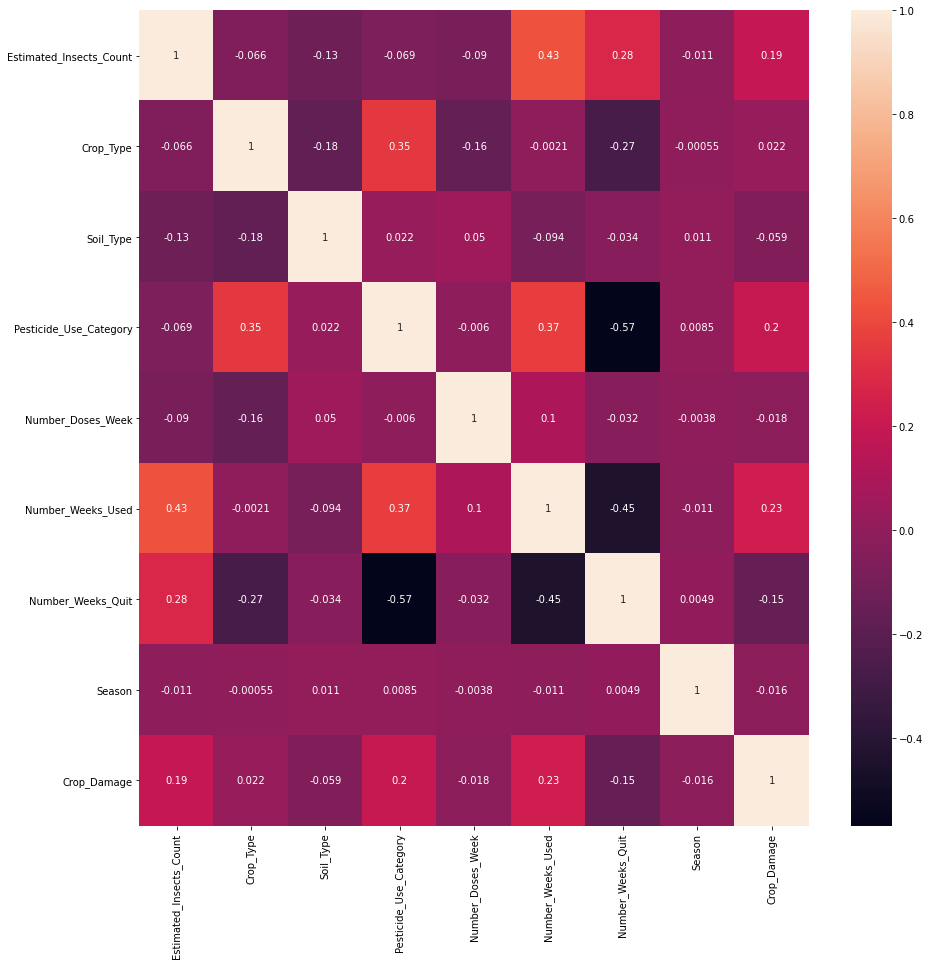

In [25]:
#BI-VARIATE ANALYSIS
corr=dftr.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corr,annot=True)

In [26]:
dftr["Crop_Damage"].unique()

array([0, 1, 2], dtype=int64)

# PLOTTING OUTLIERS

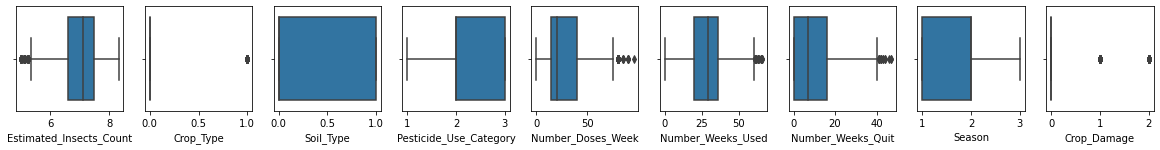

In [27]:
collist=dftr.columns.values
ncol=11
nrow=11
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(dftr[collist[i]])

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(dftr))
z

array([[2.70008118, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [2.53999082, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [2.22743384, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.06401051, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.06401051, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.06401051, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [29]:
threshold=3
dftr_new=dftr[(z<3).all(axis=1)]
dftr_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.236442,1,0,1,0,0.000000,0,1,0
1,5.342334,1,0,1,0,0.000000,0,2,1
2,5.549076,1,0,1,0,0.000000,0,2,1
3,5.549076,1,1,1,0,0.000000,0,2,1
4,5.834811,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,7.667626,0,1,2,20,28.891027,1,1,1
4595,7.668094,0,1,2,30,47.000000,2,1,1
4596,7.726213,0,1,2,10,7.000000,27,2,0
4597,7.726213,0,1,2,10,20.000000,24,2,0


# FINDING THE SKEWNESS IN THE GIVEN DATA-SET - TEST DATA

In [30]:
dfte.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

# correcting the skewness

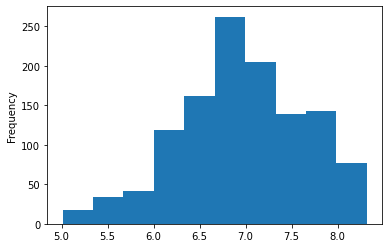

In [31]:
#removing skewness using boxcox
from scipy.stats import boxcox
dfte["Estimated_Insects_Count"]=boxcox(dfte["Estimated_Insects_Count"],0) #0 represents log transform
dfte["Estimated_Insects_Count"].plot.hist()

In [32]:
dfte.drop(["ID"],axis=1,inplace=True)
dfte

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,5.236442,1,1,1,0,29.033333,0,2
1,6.016157,1,1,1,0,0.000000,0,2
2,6.439350,1,0,1,0,0.000000,0,2
3,6.594413,1,0,1,0,0.000000,0,2
4,6.670766,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,7.031741,0,1,2,40,34.000000,7,3
1195,7.031741,0,1,2,40,25.000000,3,1
1196,7.031741,0,1,2,20,13.000000,23,1
1197,7.100027,0,1,2,10,35.000000,5,1


# PLOTTING OUTLIERS

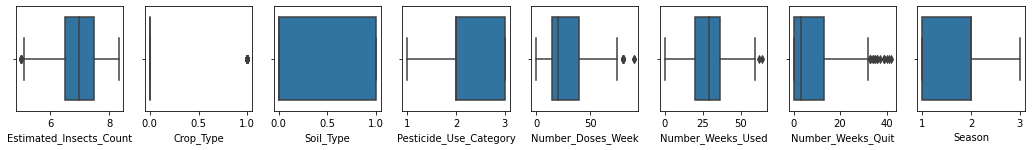

In [33]:
collist=dfte.columns.values
ncol=11
nrow=11
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(dfte[collist[i]])

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(dfte))
z

array([[2.49459390e+00, 2.03615391e+00, 1.09360445e+00, ...,
        5.85986262e-16, 7.96003797e-01, 1.72804130e-01],
       [1.35546404e+00, 2.03615391e+00, 1.09360445e+00, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       [7.37197239e-01, 2.03615391e+00, 9.14407397e-01, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       ...,
       [1.28259984e-01, 4.91122009e-01, 1.09360445e+00, ...,
        1.32227276e+00, 1.79995135e+00, 1.28629553e+00],
       [2.28022714e-01, 4.91122009e-01, 1.09360445e+00, ...,
        4.92072401e-01, 2.31665722e-01, 1.28629553e+00],
       [2.28022714e-01, 4.91122009e-01, 1.09360445e+00, ...,
        5.85986262e-16, 1.46134850e+00, 1.63190379e+00]])

In [35]:
threshold=3
dfte_new=dfte[(z<3).all(axis=1)]
dfte_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,5.236442,1,1,1,0,29.033333,0,2
1,6.016157,1,1,1,0,0.000000,0,2
2,6.439350,1,0,1,0,0.000000,0,2
3,6.594413,1,0,1,0,0.000000,0,2
4,6.670766,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,7.031741,0,1,2,40,34.000000,7,3
1195,7.031741,0,1,2,40,25.000000,3,1
1196,7.031741,0,1,2,20,13.000000,23,1
1197,7.100027,0,1,2,10,35.000000,5,1


# PREPARING DATA-SET FOR TRAINING AND TESTING

In [36]:
x=dftr_new.drop(["Crop_Damage"],axis=1)
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,5.236442,1,0,1,0,0.000000,0,1
1,5.342334,1,0,1,0,0.000000,0,2
2,5.549076,1,0,1,0,0.000000,0,2
3,5.549076,1,1,1,0,0.000000,0,2
4,5.834811,1,0,1,0,0.000000,0,2
...,...,...,...,...,...,...,...,...
4594,7.667626,0,1,2,20,28.891027,1,1
4595,7.668094,0,1,2,30,47.000000,2,1
4596,7.726213,0,1,2,10,7.000000,27,2
4597,7.726213,0,1,2,10,20.000000,24,2


In [37]:
y=dftr_new["Crop_Damage"]
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4382, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [39]:
x_train.shape

(3417, 8)

In [40]:
y_train.shape

(3417,)

In [41]:
x_test.shape

(965, 8)

In [42]:
y_test.shape

(965,)

# MACHINE LEARNING MODELS
## For the above data-set we will use

## 1.LOGISTIC REGRESSION

## 2.NAIVES BAYES CLASSIFICATION

## 3.KNeighborsClassifier

## 4.Support vector Machine(SVC)


In [43]:
#Logical regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)#for Training purpose
lg_pred=lg.predict(x_test)#for Testing purpose
print(lg_pred)
print("\nAccuracy score : ",accuracy_score(y_test,lg_pred)*100)
print("\nConfussion matrix : ",confusion_matrix(y_test,lg_pred))
print("\nclassification report : ",classification_report(y_test,lg_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [44]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
acc={metrics.accuracy_score(y_test, y_pred)*100}
print("Accuracy:",acc)

Accuracy: {82.79792746113989}


In [45]:
#finding best parameters for svr
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
parameters={"kernel":["linera","poly","rbf","sigmoid"]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'rbf'}


In [46]:
#SVR METHOD
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
sv=SVR(kernel="rbf")
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("r2score : " ,svs*100)
svscore=cross_val_score(sv,x,y,cv=3)
svc=svscore.mean()
print("cross value score : ",svc*100)

r2score :  0.4609041235441036
cross value score :  0.9035315761530863


In [47]:
#Hyerparameter tuning for KNeighborsClassifier 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters={"algorithm":["auto", "ball_tree", "kd_tree", "brute"],"weights":["uniform","distance"]}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'brute', 'weights': 'uniform'}


In [48]:
knn=KNeighborsClassifier(algorithm="brute",weights="uniform")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
knn.fit(x_train,y_train)
knn_test_pred=knn.predict(x_test)
print(" Accuracy score is :",accuracy_score(y_test,knn_test_pred)*100)

 Accuracy score is : 82.78221208665907


In [49]:
#finding best random state for prediction
from sklearn.svm import SVC
svc=SVC()
for i in range(1,200):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svc.fit(x_train,y_train)
    svc_train=svc.predict(x_train)
    svc_pred=svc.predict(x_test)
    if round(accuracy_score(y_train,svc_train)*100,1)==round(accuracy_score(y_test,svc_pred)*100,1):
        print("At Random state ", i ,"the model is performing well")
        print("At Random state : ",i)
        print("Training accuracy score is :",accuracy_score(y_train,svc_train)*100)
        print("Testing accuracy score is :",accuracy_score(y_test,svc_pred)*100)

At Random state  43 the model is performing well
At Random state :  43
Training accuracy score is : 85.22111269614837
Testing accuracy score is : 85.17673888255416
At Random state  94 the model is performing well
At Random state :  94
Training accuracy score is : 85.59201141226819
Testing accuracy score is : 85.63283922462942


In [50]:
svc=SVC(kernel="rbf",gamma="scale")
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=340,test_size=0.20)
svc.fit(x_train,y_train)
svc_train=svc.predict(x_train)
svc_pred=svc.predict(x_test)
print(" Accuracy score is :",accuracy_score(y_test,svc_pred)*100)

 Accuracy score is : 87.9133409350057


# From the above Machine Learning Models we can conclude that "Support vector Machine(SVC)" has the highest accuracy rate of "87.91% with a negligble difference.

## Thus, we will use "Support vector Machine(SVC)" for the prediction.  


## HYPER TUNNING THE MACHINE LEARNING MODEL :

In [53]:
#cross value score of Support vector Machine(SVC)
svc_pred=svc.predict(x_test)
from sklearn.model_selection import cross_val_score
svc_accu=accuracy_score(y_test,svc_pred)
for i in range(2,6):
    svc_cr=cross_val_score(svc,x,y,cv=i)
    svcc=svc_cr.mean()
    print("At cv : ",i,"\ncross val score is : ",svcc*100,"\naccuracy score is: ",svc_accu*100)
    print("\n\n")

At cv :  2 
cross val score is :  85.14376996805112 
accuracy score is:  87.9133409350057



At cv :  3 
cross val score is :  85.14376842032885 
accuracy score is:  87.9133409350057



At cv :  4 
cross val score is :  85.14377728893777 
accuracy score is:  87.9133409350057



At cv :  5 
cross val score is :  85.1437809468768 
accuracy score is:  87.9133409350057





# SAVING THE MODEL

In [54]:
import pickle
filename="Agriculture Dataset.pkl"
pickle.dump(svc,open(filename,"wb"))

In [55]:
dfte_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,5.236442,1,1,1,0,29.033333,0,2
1,6.016157,1,1,1,0,0.000000,0,2
2,6.439350,1,0,1,0,0.000000,0,2
3,6.594413,1,0,1,0,0.000000,0,2
4,6.670766,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,7.031741,0,1,2,40,34.000000,7,3
1195,7.031741,0,1,2,40,25.000000,3,1
1196,7.031741,0,1,2,20,13.000000,23,1
1197,7.100027,0,1,2,10,35.000000,5,1


# PREDICTING THE DATA WITH THE TESTING DATA

In [57]:
fitted_model=pickle.load(open("Agriculture Dataset.pkl","rb"))

In [58]:
fitted_model

SVC()

In [59]:
predictions=fitted_model.predict(dfte_new)

In [60]:
 predictions

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# CONCLUSION REMARKS:
## We can visibly see that the Machine learning model performs well with a higher accuracy of prediction.